# Puzzles stats

In [22]:
import numpy as np
import pandas as pd
from rich.jupyter import print

from polarize.difficulty import puzzle_features
from polarize.encode import canonical_puzzles_with_unique_solution, decode_puzzle
from polarize.solve import quick_has_unique_solution

In [19]:
def find_unique_with_fewer(canonical_lights, canonical_dominoes):
    unique_with_fewer = np.empty(canonical_lights.shape, dtype=bool)
    for i in range(len(canonical_lights)):
        puzzle = decode_puzzle(canonical_lights[i], canonical_dominoes[i])
        unique_with_fewer[i] = quick_has_unique_solution(puzzle, fewer_pieces_allowed=True)
    return canonical_lights[unique_with_fewer], canonical_dominoes[unique_with_fewer]

In [4]:
num_pieces = 4

In [20]:
canonical_lights, canonical_dominoes = canonical_puzzles_with_unique_solution(num_pieces)
len(canonical_lights)

3161

In [21]:
canonical_lights, canonical_dominoes = find_unique_with_fewer(canonical_lights, canonical_dominoes)
len(canonical_lights)

1876

In [23]:
all_features = []
for i in range(len(canonical_lights)):
    puzzle = decode_puzzle(canonical_lights[i], canonical_dominoes[i])
    features = dict(puzzle_features(puzzle))
    features["lights"] = canonical_lights[i]
    features["dominoes"] = canonical_dominoes[i]
    all_features.append(features)
df = pd.DataFrame(all_features)
df

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
0,4,1,2,16,1365,4
1,4,1,2,16,1450,64
2,4,2,2,13,1622,19
3,4,2,2,13,1622,12544
4,4,3,2,17,1622,1114114
...,...,...,...,...,...,...
1871,4,4,0,45,38554,268501009
1872,4,4,0,45,38554,268501249
1873,4,4,0,42,39578,1118224
1874,4,4,0,42,39578,16846864


In [24]:
df.describe()

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
count,1876.0,1876.000000,1876.000000,1876.000000,1876.000000,1.876000e+03
mean,4.0,3.082623,1.269723,22.786780,14268.858209,1.344617e+08
std,0.0,0.630003,0.533427,6.382255,8423.257204,1.716538e+08
min,4.0,1.000000,0.000000,9.000000,1365.000000,4.000000e+00
25%,4.0,3.000000,1.000000,18.000000,6761.750000,1.118224e+06
50%,4.0,3.000000,1.000000,23.000000,10602.000000,1.685094e+07
75%,4.0,3.000000,2.000000,27.000000,21098.000000,2.685706e+08
max,4.0,4.000000,2.000000,48.000000,39578.000000,8.053064e+08


In [9]:
[len(df[df.num_yellow_spots == i]) for i in range(3)]

[82, 1206, 588]

In [10]:
# easy puzzle?
df[df.total_num_valid_domino_places == 9]

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
1306,4,3,2,9,19042,2162704
1307,4,3,2,9,19042,2162944
1310,4,3,2,9,19042,301989904
1311,4,3,2,9,19042,301990144
1330,4,3,2,9,19078,2162704
1331,4,3,2,9,19078,2162944
1334,4,3,2,9,19078,301989904
1335,4,3,2,9,19078,301990144


In [11]:
puzzle = decode_puzzle(19042, 2162704)
print(puzzle)

████ 
█....█
█....█
█....█
█....█
 ████ 
\/
\/
\\
\
/

In [12]:
# hard puzzle?
df[df.total_num_valid_domino_places == 48]

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
1448,4,3,0,48,22105,69634
1449,4,3,0,48,22105,73729
1450,4,3,0,48,22105,268439554
1451,4,3,0,48,22105,268443649


In [13]:
puzzle = decode_puzzle(22105, 69634)
print(puzzle)

████ 
█....█
█....█
█....█
█....█
 ████ 
\\
/
/
\
\
\
\

In [14]:
! pip install matplotlib

array([[<Axes: title={'center': 'total_num_valid_domino_places'}>]],
      dtype=object)

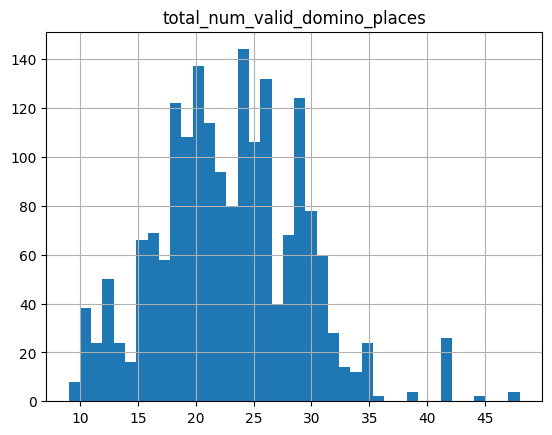

In [15]:
df.hist(column="total_num_valid_domino_places", bins=40)

array([[<Axes: title={'center': 'num_yellow_spots'}>]], dtype=object)

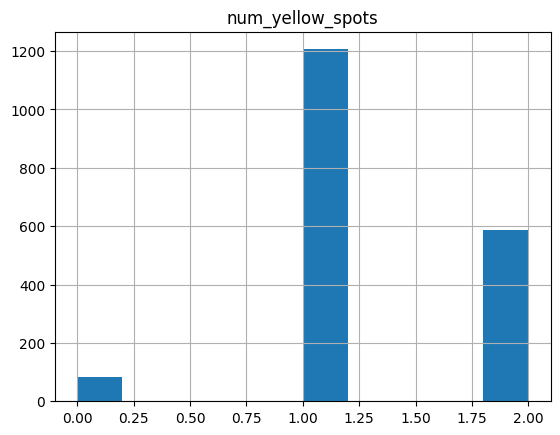

In [16]:
df.hist(column="num_yellow_spots")

array([[<Axes: title={'center': 'num_distinct_dominoes'}>]], dtype=object)

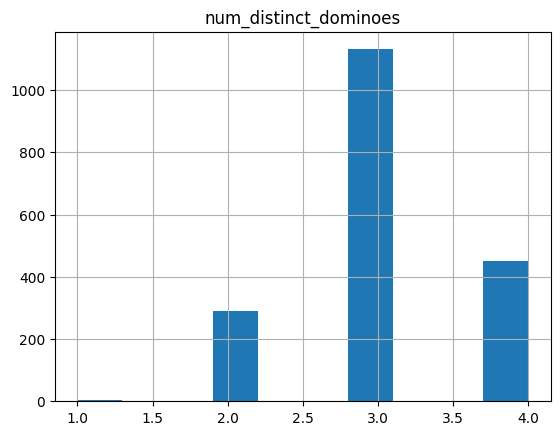

In [17]:
df.hist(column="num_distinct_dominoes")

In [26]:
num_pieces = 5

In [28]:
canonical_lights, canonical_dominoes = canonical_puzzles_with_unique_solution(num_pieces)
canonical_lights, canonical_dominoes = find_unique_with_fewer(canonical_lights, canonical_dominoes)
len(canonical_lights)

424

In [29]:
all_features = []
for i in range(len(canonical_lights)):
    puzzle = decode_puzzle(canonical_lights[i], canonical_dominoes[i])
    features = dict(puzzle_features(puzzle))
    features["lights"] = canonical_lights[i]
    features["dominoes"] = canonical_dominoes[i]
    all_features.append(features)
df = pd.DataFrame(all_features)
df

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
0,5,3,1,39,5530,77840
1,5,3,1,39,5530,78080
2,5,3,1,39,5530,268435475
3,5,3,1,39,5530,268435715
4,5,3,1,38,5738,135200
...,...,...,...,...,...,...
419,5,3,1,39,35482,538968320
420,5,3,1,35,35498,3145745
421,5,3,1,35,35498,3145985
422,5,3,1,35,35498,50331665


In [30]:
df.describe()

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
count,424.0,424.000000,424.000000,424.000000,424.000000,4.240000e+02
mean,5.0,3.160377,0.849057,35.377358,19447.207547,1.554359e+08
std,0.0,0.635986,0.358417,7.525783,9250.138838,2.218083e+08
min,5.0,2.000000,0.000000,20.000000,5530.000000,8.195000e+03
25%,5.0,3.000000,1.000000,29.000000,10413.250000,2.105360e+06
50%,5.0,3.000000,1.000000,36.000000,22106.000000,1.887437e+07
75%,5.0,4.000000,1.000000,39.000000,25242.000000,2.694840e+08
max,5.0,4.000000,1.000000,60.000000,35498.000000,8.220836e+08


array([[<Axes: title={'center': 'total_num_valid_domino_places'}>]],
      dtype=object)

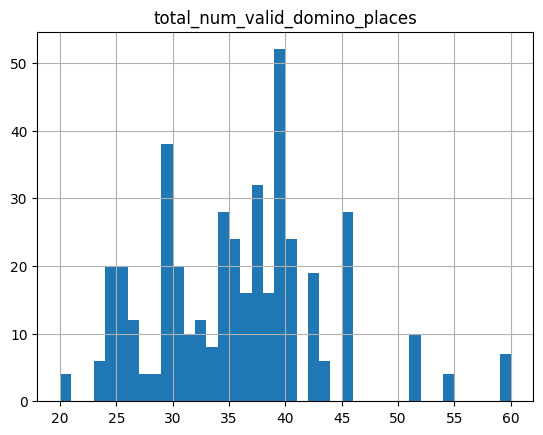

In [31]:
df.hist(column="total_num_valid_domino_places", bins=40)

In [34]:
# easy puzzle?
df[df.total_num_valid_domino_places == 20]

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
275,5,3,1,20,23138,1245440
277,5,3,1,20,23138,822083600
283,5,3,1,20,23174,1245440
285,5,3,1,20,23174,822083600


In [36]:
puzzle = decode_puzzle(23138, 1245440)
print(puzzle)

████ 
█....█
█....█
█....█
█....█
 ████ 
\/
\\
\\
\\
/
\

In [37]:
# hard puzzle?
df[df.total_num_valid_domino_places == 60]

,num_dominoes,num_distinct_dominoes,num_yellow_spots,total_num_valid_domino_places,lights,dominoes
31,5,2,1,45,6745,537067520
32,5,2,1,45,6745,805437440
34,5,2,1,45,6746,537067520
36,5,2,1,45,6746,805437440
86,5,2,1,45,9817,537067520
87,5,2,1,45,9817,805437440
88,5,2,1,45,9818,537067520
89,5,2,1,45,9818,805437440
106,5,2,1,45,10585,537067520
107,5,2,1,45,10585,805437440


In [38]:
puzzle = decode_puzzle(22106, 73730)
print(puzzle)

████ 
█....█
█....█
█....█
█....█
 ████ 
//
//
\\
\\
\\